#Домашнее задание №4

#Задание №1

Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.
Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл.  Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

In [35]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [74]:
with open('Potter.txt', 'r', encoding='utf-8', errors='ignore') as f: #открываем файл, чтобы прочитать 
    text = f.read()
    punct = ' '.join([word.strip("[\'!\"#$%&()*+,-./:;<=>?@[\]^_`{|}~„“«»†*—/\-]") for word in text.split()])#обрезаем пунктуацию 
    b = punct.replace("—","") #убираем тире, которое не обрезается стрипом, так как не является составной частью отдельного элемента word
    textwp = b.lower() #приводим все к нижнему регистру
    from nltk.tokenize import word_tokenize #разбиваем на токены
    tok = word_tokenize(textwp)
    from nltk import WordNetLemmatizer #импортируем и ламматизируем, указывая теги(части речи) для лучшего распознавания форм
    wnl = WordNetLemmatizer()
    l = [wnl.lemmatize(w, pos = 'v') for w in tok]
    lem = [wnl.lemmatize(w, pos = 'n') for w in l]
    finaltext =' '.join(lem) #объединяем в строку 
with open ('lem.txt', 'w+', encoding = 'utf-8') as r:#открываем файл для записи 
           for w in finaltext:
            r.write(w) #записываем леммы в файл 
with open('lem.txt', 'r') as f:
        b = f.read()
        print(b[:500]) #выводим часть текста 

chapter one the boy who live mr and mr dursley of number four privet drive be proud to say that they be perfectly normal thank you very much they be the last people you 'd expect to be involve in anything strange or mysterious because they just do n't hold with such nonsense mr dursley be the director of a firm call grunnings which make drill he be a big beefy man with hardly any neck although he do have a very large mustache mr dursley be thin and blonde and have nearly twice the usual amount o


Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д. 

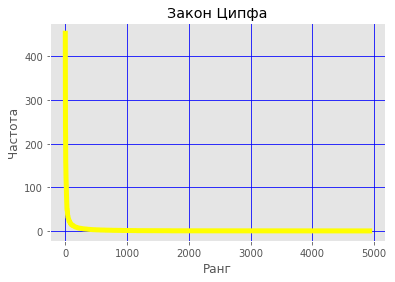

In [116]:
import matplotlib
import matplotlib.pyplot as plt
with open('lem.txt', 'r', encoding = 'utf-8') as f: #открываем файл с леммами 
    lems = f.read()#читаем
    d ={} #создаем словарь для записи значений с абсолютной частотой 
for word in lems.split():
    if word not in d:
        d[word] = 1
    else:
        d[word] += 1
fr = sorted(d.items(), key = lambda x: x[1], reverse = True) #сортировка 
frs = dict(sorted(d.items(), key=lambda x: x[1], reverse=True)) 
X = [] #ось Х - ранг: для каждого элемента списка упорядочивание в соответствии с количеством символов созданного словаря 
for w in range (1, len(d)+1):
    X.append(w)
Y = {} #словарь для записи подсчета относительной частоты 
length = len(lems.split()) #количество символов текста 
sort = sorted(frs.items(), key = lambda x: x[1], reverse = True)#обращаемся к словарю с сортировкой по убыванию абсолютной частоты
for k, v in sort:  
    x = v/length * 10000 #высчитываем по формуле в конспекте относительную частоту 
    Y[k] = x #ранжирование 
Y =list(Y.values())#создаем список из значений словаря для координатной прямой
#оформляем график 
from matplotlib import style 
style.use('ggplot') 
plt.plot(X,Y, 'yellow', linewidth=5) 
plt.grid(True,color='blue')
plt.xlabel("Ранг")
plt.ylabel("Частота")
plt.title("Закон Ципфа")
plt.show()


Очистите от стоплслов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

chapter one boy lived mr mrs dursley number four privet drive proud say perfectly normal thank much last people 'd expect involved anything strange mysterious n't hold nonsense mr dursley director firm called grunnings made drills big beefy man hardly neck although large mustache mrs dursley thin bl


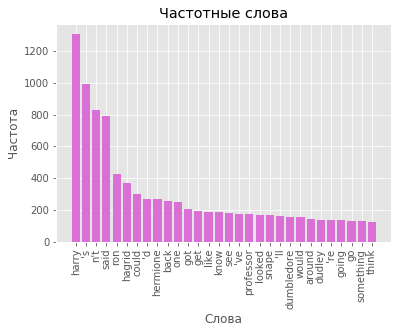

In [147]:
from nltk.corpus import stopwords
sw = stopwords.words('english') #импортируем встроенный модуль с англ стопсловами 
filtered = ' '.join([w for w in tok if w not in sw]) #на токены разбили при лемматизации, так что можно сразу очистить от стопслов 
print(filtered[:300]) #выводим часть текста 
d={} #создаем словарь для записи значений с абсолютной частотой 
for word in filtered.split():
    if word not in d:
        d[word] = 1
    else:
        d[word] += 1
fr = sorted(d.items(), key = lambda x: x[1], reverse = True) # сортируем
frs = dict(sorted(d.items(), key=lambda x: x[1], reverse=True)) #создаем словарь из сортированной частоты
Y = list(frs.values())#создаем список из значений словаря для коодинатной линии
WX = list(frs.keys()) #создаем список из значений словаря для коодинатной линии
X = [i for i in range(0,30)]
#оформляем график
plt.title("Частотные слова")
plt.xlabel("Слова")
plt.ylabel("Частота")
plt.xticks(X, WX, rotation=90)
plt.bar(X,Y[:30], color='orchid')
plt.show()